<h2>Parts of Speech Tagging(POS Tag)</h2>

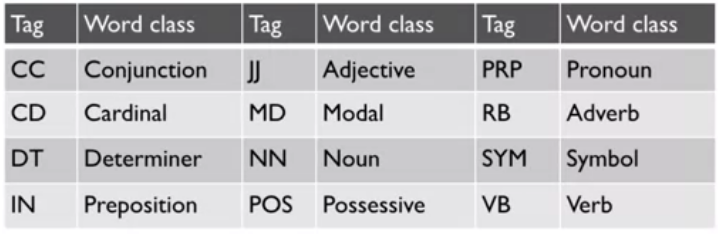

In [2]:
import nltk

<h3>Download nltk all</h3>

In [5]:
#nltk.download('all')

<h5>Modal Auxiliary</h5>

In [6]:
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


<h5>Cardinal/Numerical</h5> 

In [7]:
nltk.help.upenn_tagset('CD')

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...


<h5>Determiner</h5>

In [8]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


<h5>Apostrophe/Possessive</h5>

In [9]:
nltk.help.upenn_tagset('POS')

POS: genitive marker
    ' 's


<h4>Steps of POS tagging </h4>

<h5>splitting using word tokenization</h5>

In [10]:
text11 = "Children Shouldn't drink Sugary Drink before Bed."

In [11]:
text13 = nltk.word_tokenize(text11)
text13 

['Children', 'Should', "n't", 'drink', 'Sugary', 'Drink', 'before', 'Bed', '.']

<h5>apply pos tagging</h5>

In [12]:
nltk.pos_tag(text13)

[('Children', 'NNP'),
 ('Should', 'MD'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('Sugary', 'NNP'),
 ('Drink', 'NNP'),
 ('before', 'IN'),
 ('Bed', 'NNP'),
 ('.', '.')]

**note:** Children: Pural Noun, Should: Modal, n't: Adverb, drink: Verb, Sugary: Pural Noun, Drink: Pural Noun, before: Preposition, Bed: Pural Noun

<h3>Ambiguity in POS Tagging </h3>

In [13]:
text14 = nltk.word_tokenize('Visiting aunts can be nuisance')
text14

['Visiting', 'aunts', 'can', 'be', 'nuisance']

In [14]:
nltk.pos_tag(text14)

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('nuisance', 'JJ')]

<h2>Parsing Sentence Structure</h2>

Making sense of sentences is easy if they follow well-defined grammatical structure

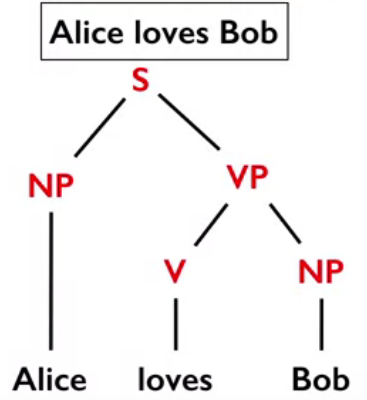

In [15]:
text16 = nltk.word_tokenize('Alice loves Bob')
text16

['Alice', 'loves', 'Bob']

In [21]:
# Parsing sentence structure
text16 = nltk.word_tokenize("Alice loves Bob")
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob'
V -> 'loves'
""")

parser = nltk.ChartParser(grammar)
trees = parser.parse_all(text16)
for tree in trees:
    print(tree)

(S (NP Alice) (VP (V loves) (NP Bob)))


In [22]:
parser = nltk.ChartParser(grammer)
parser

In [23]:
text17 = nltk.word_tokenize("I saw the man with a telescope")
grammar1 = nltk.data.load('mygrammar.cfg')
grammar1

<Grammar with 13 productions>

In [26]:
trees = parser.parse_all(text17)
trees

[Tree('S', [Tree('NP', ['I']), Tree('VP', [Tree('VP', [Tree('V', ['saw']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['man'])])]), Tree('PP', [Tree('P', ['with']), Tree('NP', [Tree('Det', ['a']), Tree('N', ['telescope'])])])])]),
 Tree('S', [Tree('NP', ['I']), Tree('VP', [Tree('V', ['saw']), Tree('NP', [Tree('Det', ['the']), Tree('N', ['man']), Tree('PP', [Tree('P', ['with']), Tree('NP', [Tree('Det', ['a']), Tree('N', ['telescope'])])])])])])]

In [27]:
for tree in trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N man)))
    (PP (P with) (NP (Det a) (N telescope)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N telescope))))))


<h3>Ambiguity in Parsing</h3>

Ambiguity may exist even if the sentence is grammartically correct

word tree either be a Noun or Verb phase
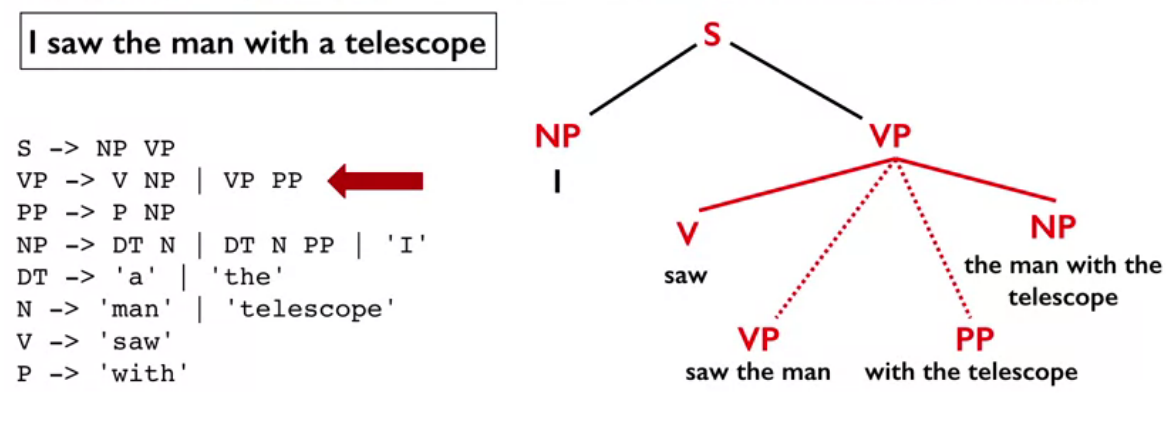

In [28]:
from nltk.corpus import treebank
text18 = treebank.parsed_sents('wsj_0001.mrg')[0]
print(text18)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


# POS tagging and parsing ambiguity

In [32]:
text19 = nltk.word_tokenize("It was raining outside. We had our umbrella")
nltk.pos_tag(text19)

[('It', 'PRP'),
 ('was', 'VBD'),
 ('raining', 'VBG'),
 ('outside', 'JJ'),
 ('.', '.'),
 ('We', 'PRP'),
 ('had', 'VBD'),
 ('our', 'PRP$'),
 ('umbrella', 'NN')]

In [33]:
text20 = nltk.word_tokenize("Nutural beautifulness is mesmerizing everyone ")
nltk.pos_tag(text20)

[('Nutural', 'JJ'),
 ('beautifulness', 'NN'),
 ('is', 'VBZ'),
 ('mesmerizing', 'VBG'),
 ('everyone', 'NN')]